# **Naïve Bayes Classification**


Check out my social profiles here to follow me. ⭐ Star This Repo, If you learned something new, a star would be truly appreciated.

[![GitHub Repo](https://img.shields.io/badge/GitHub%20Repo-000000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Ramakm/ai-hands-on)

[![X](https://img.shields.io/badge/X-000000?style=for-the-badge&logo=x&logoColor=white)](https://x.com/techwith_ram)
[![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/Ramakm)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/ramakrushnamohapatra/)
[![Instagram](https://img.shields.io/badge/Instagram-E4405F?style=for-the-badge&logo=instagram&logoColor=white)](https://instagram.com/techwith.ram)


`Guys, not a single line here written by AI. Its all my effort in markdowns cells.`


Naive Bayes is a classification algorithm that is based on Bayes’ theorem. Bayes’ theorem states that the probability of an event is equal to the prior probability of the event multiplied by the likelihood of the event given some evidence. In the context of classification, this means that we are trying to find the class that is most likely given a set of features or attributes.

Naive Bayes assumes that the features are independent of each other, meaning that the presence or absence of one feature does not affect the presence or absence of another feature. This simplifies the calculation of the likelihood of the features, as we can calculate the likelihood of each feature separately and then multiply them together.

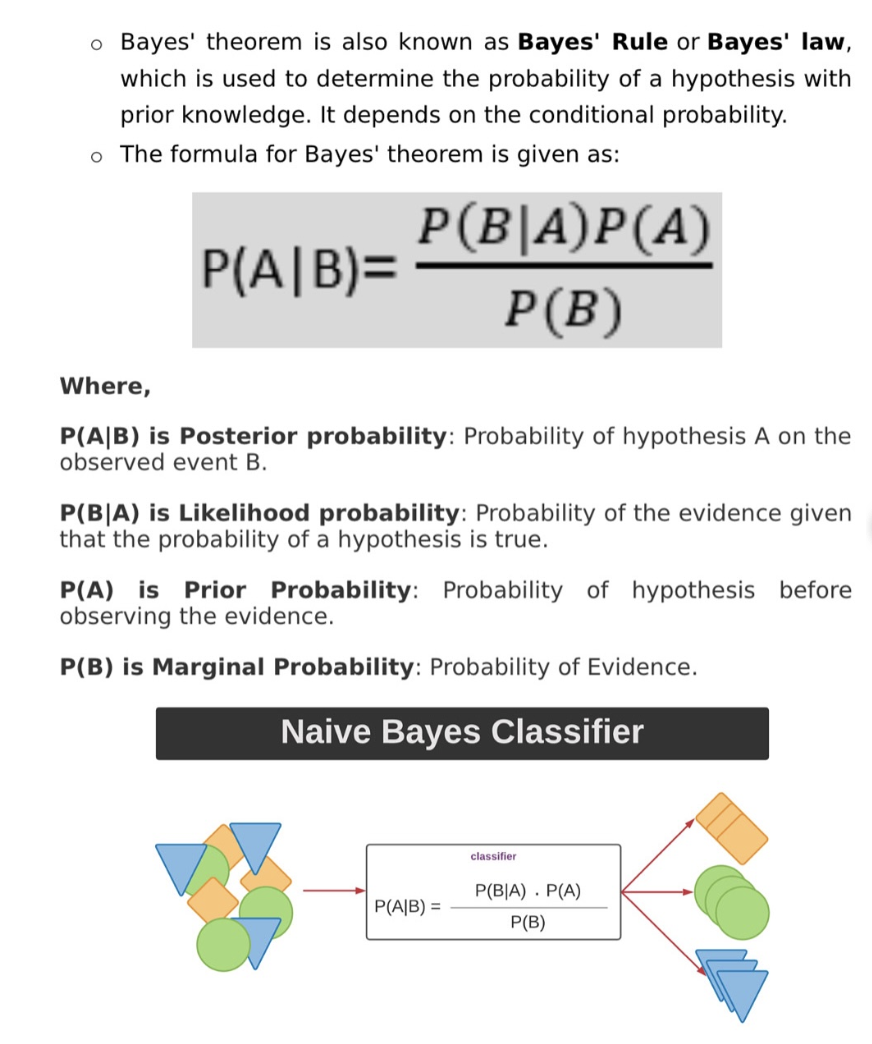

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Check Dataset [here](https://www.kaggle.com/datasets/rakeshrau/social-network-ads)**

In [ ]:
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

In [ ]:
df.count()

,0
User ID,400
Gender,400
Age,400
EstimatedSalary,400
Purchased,400


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**We don't need ID column here**

In [ ]:
df.drop(columns = ['User ID'], inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


## **Distribution Of Data**



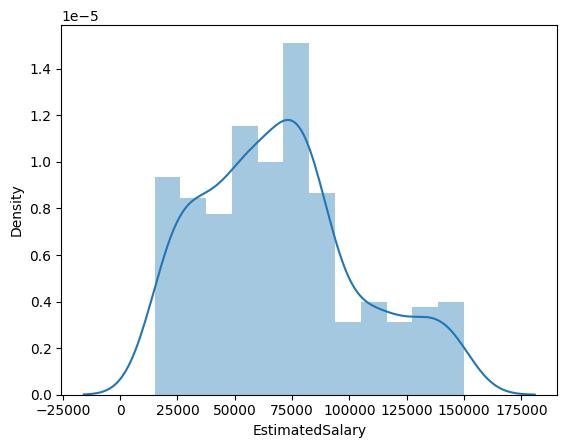

In [ ]:
sns.distplot(df['EstimatedSalary'])
plt.show()

## **Label encoding**

 This is where I will categorical data is converted into numerical values, to make it compatible with mathematical operations and models.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [ ]:
LE = LabelEncoder()
df['Gender']= LE.fit_transform(df['Gender'])

## **Correlation matrix**

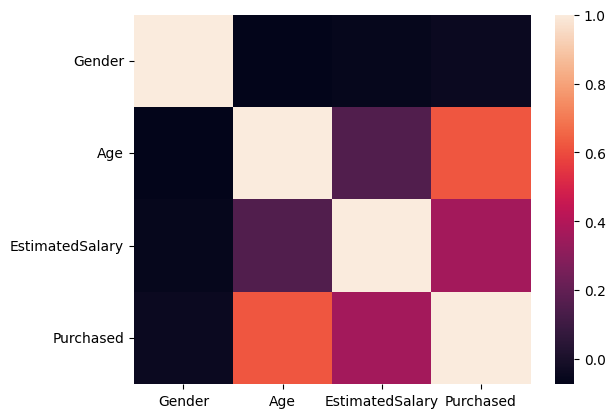

In [ ]:
df.corr()
sns.heatmap(df.corr())
plt.show()

**Drop insignificant data**

In [ ]:
df.drop(columns=['Gender'], inplace=True)

## **Split Data**

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = True)

## **Feature scaling**

Two common methods of feature scaling: normalization and standardization.

* `Normalization ` : Scales the values of the variables so that they fall between 0 and 1. This is done by subtracting the minimum value of the feature and dividing it by the range (max-min).

* `Standardization` : Transforms the values of the variables so that they have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean and dividing it by the standard deviation.


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Training**


In [ ]:
# Classifier
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

## **Model Prediction**

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
y_pred = NB_classifier.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.86

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [ ]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.8333333333333334


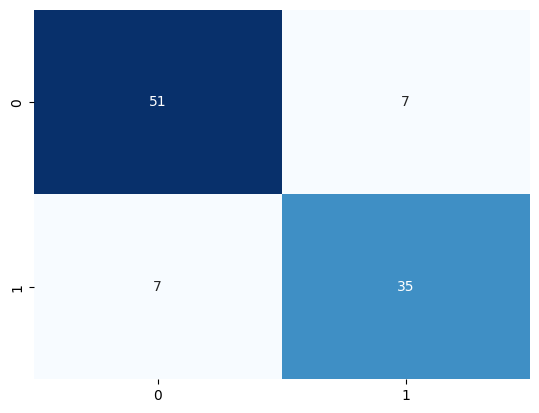

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.show()

### **Precision-Recall Curve**


This summarizes the performance of a binary classification model as a trade-off between precision and recall and is useful for evaluating the model’s ability to make accurate positive predictions while finding as many positive instances as possible.

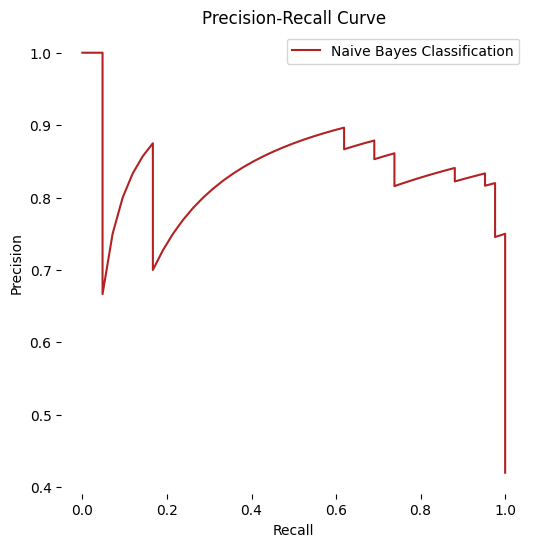

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall, precision, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box(False)
ax.legend();
plt.show()

### **AUC/ROC Curve**

* `ROC curve` plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different thresholds of the model’s prediction probabilities. The TPR is the number of true positive predictions divided by the number of actual positive instances, while the FPR is the number of false positive predictions divided by the number of actual negative instances.

* The `AUC `is the area under the ROC curve and provides a single-number metric that summarizes the performance of the model over the entire range of possible thresholds.

A **high AUC** indicates that the model is able to **distinguish** positive instances from negative instances well.



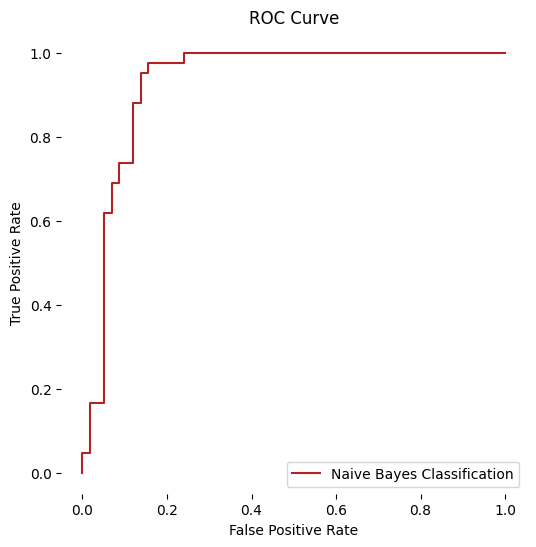

In [ ]:
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Naive Bayes Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();